In [331]:
import numpy as np
import pandas as pd


In [332]:
df = pd.read_csv('/content/amazon_alexa.tsv', delimiter='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [334]:
# data cleaning
# eda
# preprocesing
# model building
# evaluating

In [335]:
df.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [336]:
df.dropna(inplace=True)

In [337]:
df.shape

(3149, 5)

In [338]:
df.duplicated().sum()

np.int64(715)

In [339]:
df.columns


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [340]:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


# Exploratory Data Analysis

In [341]:
df['feedback'].value_counts()

,count
feedback,
1,2893
0,256


In [342]:
# since 92% are +ve feedbacks so make sure to get an accuracy more than that

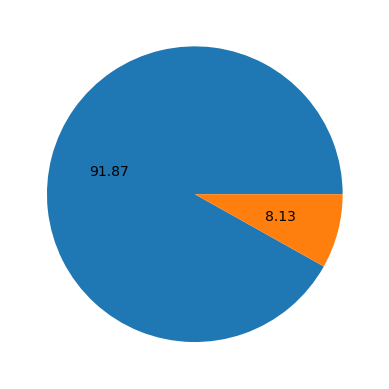

In [343]:
import matplotlib.pyplot as plt
plt.pie(df['feedback'].value_counts(), autopct="%0.2f")
plt.show()

In [344]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [345]:
df['num_characters'] = df['verified_reviews'].apply(len)

In [346]:
df['num_words'] = df['verified_reviews'].apply(lambda x: len(nltk.word_tokenize(x)))

In [347]:
df['num_sentences'] = df['verified_reviews'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [348]:
df.head()

,rating,date,variation,verified_reviews,feedback,num_characters,num_words,num_sentences
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,4,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,3,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,41,2
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,38,3
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,1


In [349]:
df[['num_characters', 'num_words', 'num_sentences']].describe()
#

,num_characters,num_words,num_sentences
count,3149.000000,3149.000000,3149.000000
mean,132.090187,29.258495,2.326453
std,182.114569,39.749947,2.026069
min,1.000000,0.000000,0.000000
25%,30.000000,7.000000,1.000000
50%,74.000000,16.000000,2.000000
75%,165.000000,36.000000,3.000000
max,2851.000000,652.000000,22.000000


In [350]:
# analyzing rating column

len(df)

3149

In [351]:
# distinct values of 'rating' and it's count
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


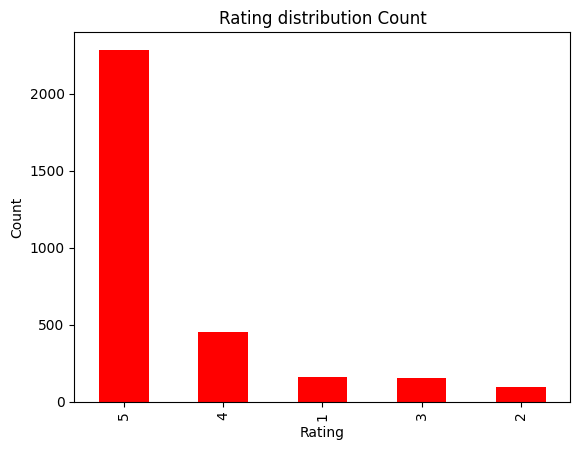

In [352]:
# plot to visualize the total counts of each rating
df['rating'].value_counts().plot.bar(color='red')
plt.title('Rating distribution Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [353]:
df['rating'].value_counts(True)

,proportion
rating,
5,0.725945
4,0.144490
1,0.051127
3,0.048269
2,0.030168


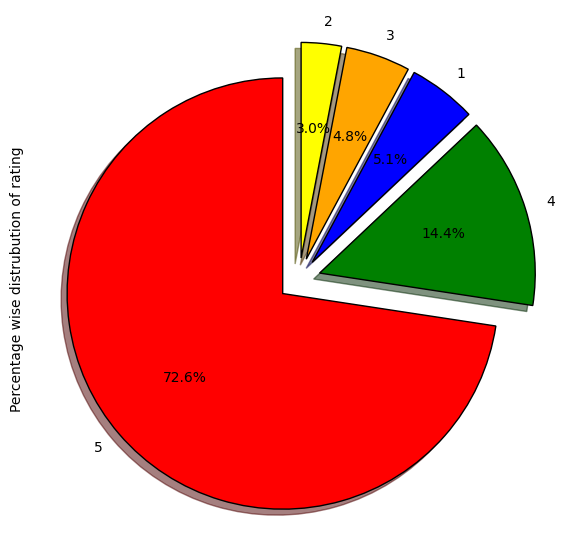

In [354]:
# let's plot a pie chart
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['rating'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

## Analyzing feedback column

In [355]:


#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [356]:
df[df['feedback'] == 0].iloc[1]['verified_reviews']

'Sound is terrible if u want good music too get a bose'

In [357]:
df[df['feedback'] == 1].iloc[1]['verified_reviews']

'Loved it!'

In [358]:
df[df['feedback'] == 1].iloc[4]['verified_reviews']

'Music'

In [359]:
# checking the feedback and rating

In [360]:
df[(df['feedback'] == 0) & (df['rating'] == 2)].iloc[7]['verified_reviews']

"Doesn't always respond when spoken to with promp word. I thought it would connect to my echo upstairs and use it like an intercom haven't been able to do that."

In [361]:
df[df['feedback'] == 1 & (df['rating'] == 4)].iloc[7]['verified_reviews']

"It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals."

In [362]:
df[df['feedback'] == 1 & (df['rating'] == 5)].iloc[7]['verified_reviews']

'Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!'

# got to know about the +ve and -ve reviews(sentiment)

In [363]:
df[['feedback', 'rating']].value_counts()

feedback  rating
1         5         2286
          4          455
0         1          161
1         3          152
0         2           95
Name: count, dtype: int64

Most reviews with feedback=1 have high ratings (mostly 5, then 4, some 3). So feedback=1 seems correlated with positive ratings.

Reviews with feedback=0 mostly have low ratings (1 and 2).

In [364]:

#Feedback = 0
df[df['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,161
2,95


In [365]:

#Feedback = 1
df[df['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


In [366]:
# positive ratings = 3, 4, 5
# negative ratings = 1, 2

# this is as per the dataset

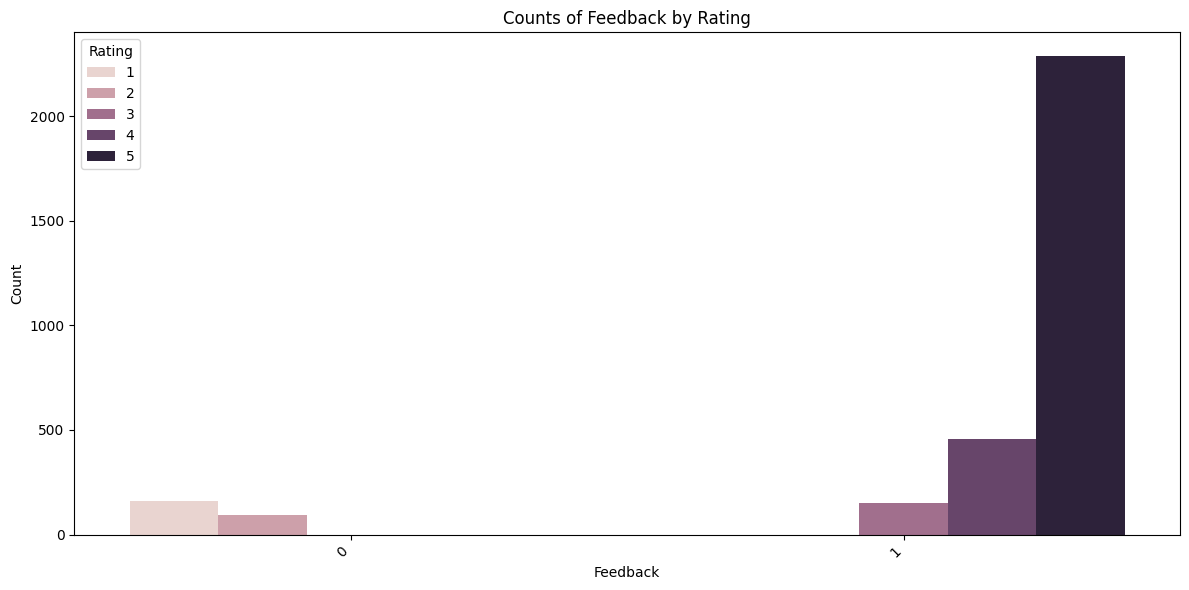

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your df is already loaded

# Get counts of each (feedback, rating) pair
counts = df[['feedback', 'rating']].value_counts().reset_index(name='count')

# Sort values for better plotting (optional)
counts = counts.sort_values('count', ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='feedback', y='count', hue='rating')

plt.title('Counts of Feedback by Rating')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


In [368]:
df.head()

,rating,date,variation,verified_reviews,feedback,num_characters,num_words,num_sentences
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,4,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,3,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,41,2
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,38,3
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,1


In [369]:
# -ve review
df[df['feedback'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,256.000000,256.000000,256.000000
mean,216.066406,47.246094,3.023438
std,236.417642,50.578206,2.540541
min,1.000000,0.000000,0.000000
25%,53.000000,12.000000,1.000000
50%,138.000000,32.000000,2.000000
75%,291.750000,64.250000,4.000000
max,1686.000000,346.000000,20.000000


In [370]:
# +ve review
df[df['feedback'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2893.000000,2893.000000,2893.000000
mean,124.659177,27.666782,2.264777
std,174.624491,38.251618,1.962757
min,1.000000,0.000000,0.000000
25%,29.000000,7.000000,1.000000
50%,69.000000,16.000000,2.000000
75%,154.000000,34.000000,3.000000
max,2851.000000,652.000000,22.000000


In [371]:
# it shows the no. of chars in -ve reviews are more than the +ve reviews but the max no. of chars are in +ve reviews

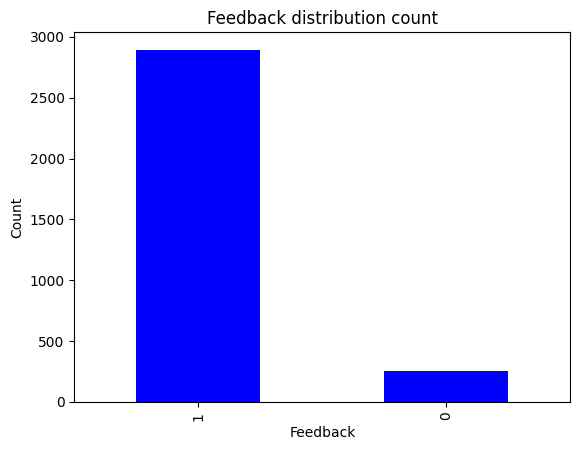

In [372]:

#Bar graph to visualize the total counts of each feedback
df['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [373]:
df['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


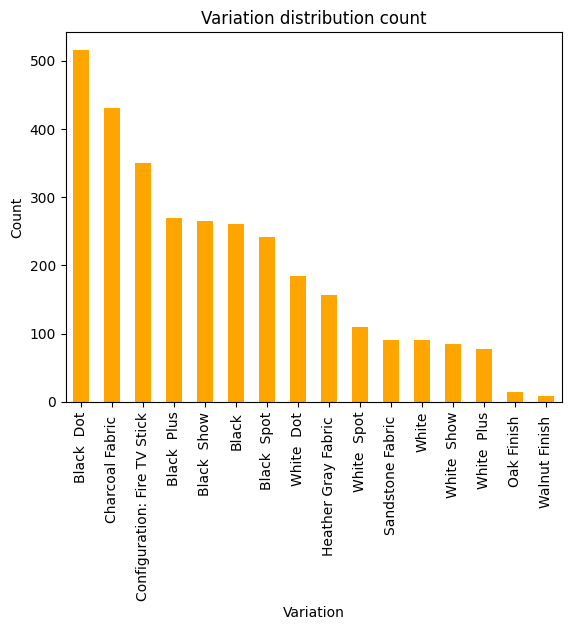

In [374]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()


In [375]:
df['variation'].value_counts(True) * 100

,proportion
variation,
Black Dot,16.386154
Charcoal Fabric,13.655129
Configuration: Fire TV Stick,11.114640
Black Plus,8.574151
Black Show,8.415370
Black,8.288346
Black Spot,7.653223
White Dot,5.843125
Heather Gray Fabric,4.985710


In [376]:
df.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


## Analyzing 'verified_reviews' column

In [377]:
df['num_characters'].describe()

,num_characters
count,3149.000000
mean,132.090187
std,182.114569
min,1.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


[Text(0.5, 1.0, 'Distribution of length of review')]

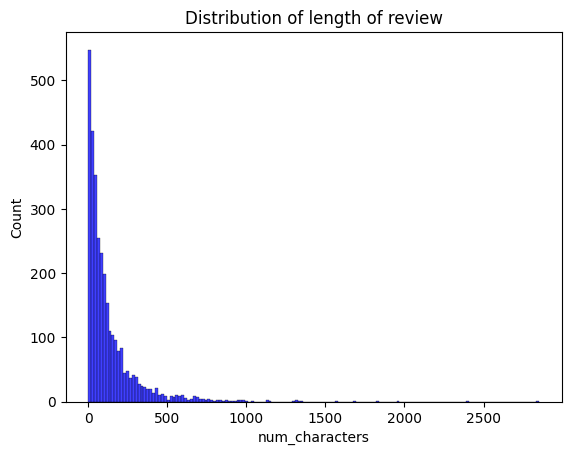

In [378]:
sns.histplot(df['num_characters'], color='blue').set(title = 'Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review')]

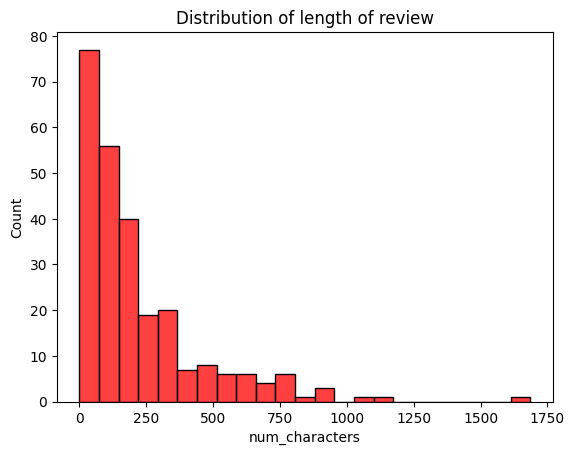

In [379]:
# length analysis when feedback is 0 -> negative

sns.histplot(df[df['feedback'] == 0]['num_characters'], color='red').set(title = 'Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review')]

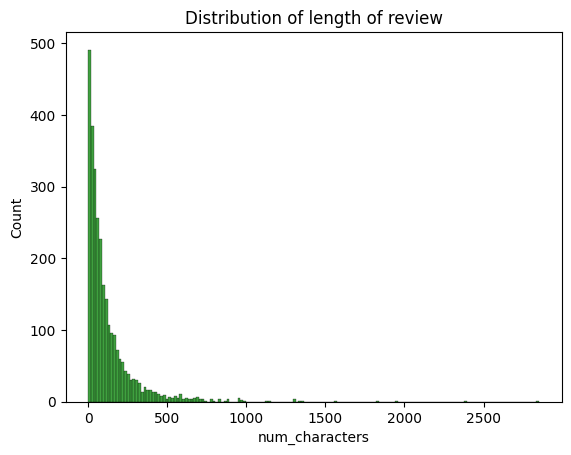

In [380]:
# length analysis when feedback is 1 -> positive

sns.histplot(df[df['feedback'] == 1]['num_characters'], color='green').set(title = 'Distribution of length of review')

In [381]:
# Lengthwise mean rating



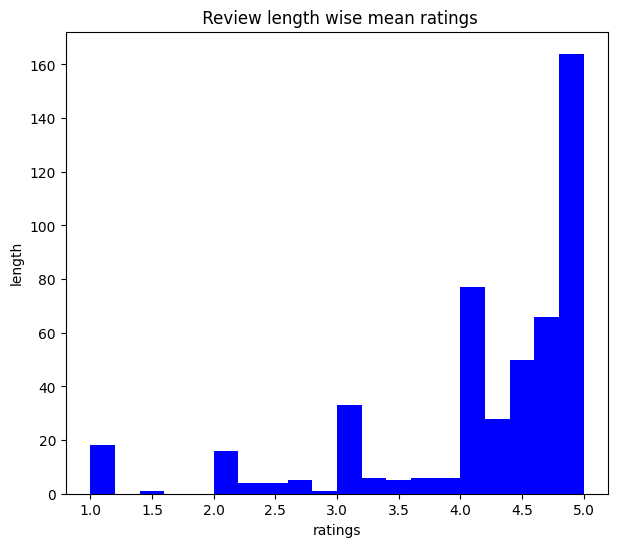

In [382]:
df.groupby('num_characters')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [383]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

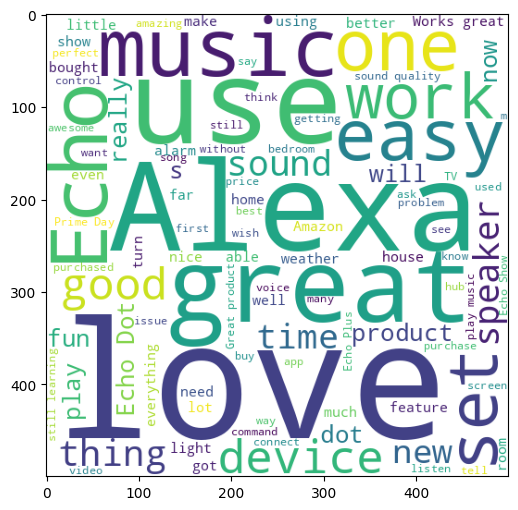

In [384]:
spam_wc = wc.generate(df[df['feedback'] == 1]['verified_reviews'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

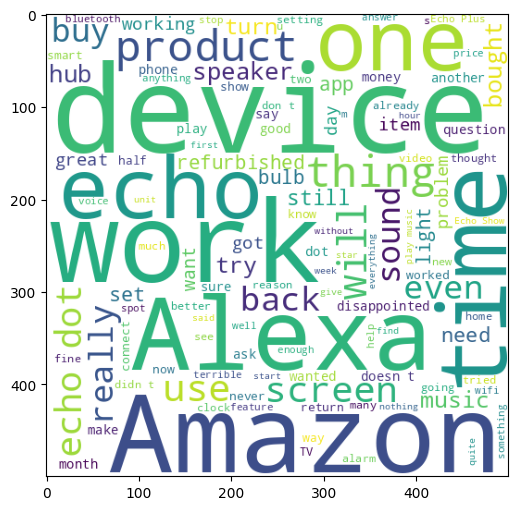

In [385]:
ham_wc = wc.generate(df[df['feedback'] == 0]['verified_reviews'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [386]:
# get the top 50 positive feedback
positive_corpus = []
text = df[df['feedback'] == 1]['verified_reviews'].tolist()
for msg in text:
  for word in msg.split():
    positive_corpus.append(word)

In [387]:
len(positive_corpus)

69327

In [388]:
from collections import Counter

p_counter = Counter(positive_corpus)
p_counter.most_common(50)

[('I', 2518),
 ('the', 2482),
 ('to', 2407),
 ('and', 1917),
 ('it', 1438),
 ('a', 1234),
 ('my', 1184),
 ('is', 1024),
 ('for', 916),
 ('with', 686),
 ('of', 649),
 ('have', 628),
 ('in', 547),
 ('love', 539),
 ('that', 520),
 ('but', 501),
 ('on', 483),
 ('this', 478),
 ('as', 423),
 ('can', 421),
 ('like', 413),
 ('so', 399),
 ('Alexa', 394),
 ('Echo', 384),
 ('was', 359),
 ('you', 351),
 ('Love', 350),
 ('great', 332),
 ('not', 330),
 ('music', 325),
 ('use', 321),
 ('up', 313),
 ('The', 309),
 ('It', 295),
 ('be', 269),
 ('set', 268),
 ('it.', 266),
 ('all', 263),
 ('are', 238),
 ('an', 236),
 ('more', 236),
 ('just', 234),
 ('one', 231),
 ('sound', 226),
 ('echo', 221),
 ('or', 212),
 ('easy', 211),
 ('when', 207),
 ('very', 202),
 ('we', 200)]

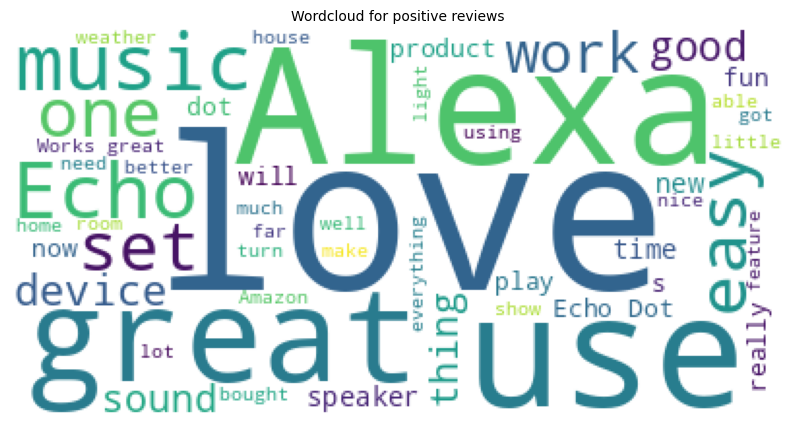

In [389]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(" ".join(positive_corpus)))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [390]:
# get the top 50 negative feedback
negative_corpus = []
text = df[df['feedback'] == 0]['verified_reviews'].tolist()
for msg in text:
  for word in msg.split():
    negative_corpus.append(word)

In [391]:
len(negative_corpus)

10345

In [392]:
from collections import Counter

n_counter = Counter(negative_corpus)
n_counter.most_common(50)

[('the', 397),
 ('to', 365),
 ('I', 317),
 ('and', 252),
 ('it', 235),
 ('a', 224),
 ('is', 164),
 ('not', 120),
 ('of', 111),
 ('this', 108),
 ('for', 98),
 ('my', 94),
 ('that', 89),
 ('you', 84),
 ('with', 82),
 ('on', 81),
 ('have', 79),
 ('in', 71),
 ('was', 70),
 ('but', 70),
 ('be', 52),
 ('The', 52),
 ('as', 50),
 ('would', 50),
 ('when', 46),
 ('up', 46),
 ('echo', 43),
 ('get', 41),
 ('It', 41),
 ('Echo', 41),
 ('like', 40),
 ('or', 39),
 ('Amazon', 38),
 ('so', 37),
 ('just', 37),
 ('from', 36),
 ('if', 35),
 ('will', 35),
 ('can', 34),
 ('no', 34),
 ('Alexa', 32),
 ('has', 32),
 ('one', 32),
 ('very', 32),
 ('device', 31),
 ('do', 30),
 ('product', 29),
 ('use', 29),
 ('an', 29),
 ('we', 28)]

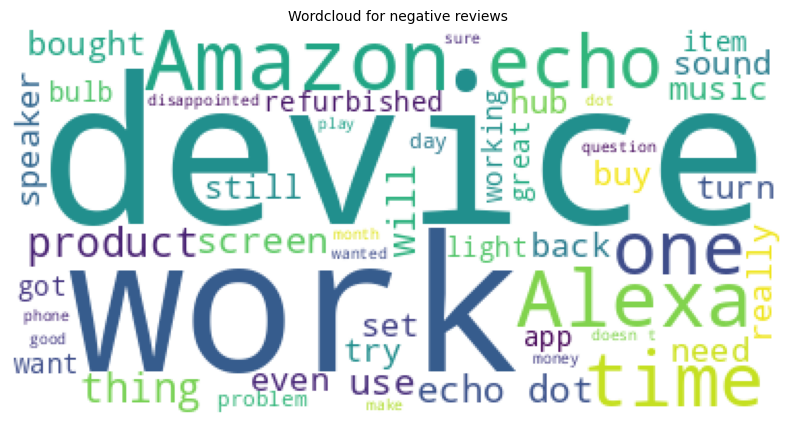

In [393]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(" ".join(negative_corpus)))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

# Text Preprocessing

In [394]:
# Download required NLTK data if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [395]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {"not", "no", "never"}

def transformed_text(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Keep alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stopwords (but keep negations)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


In [396]:
corpus = [transformed_text(review) for review in df['verified_reviews']]

In [397]:
corpus

['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
 'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well',
 'music',
 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone not use many feature ipad not see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response not seem smartbon politics yet',
 'think 5th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house',
 'look great',
 'love listened song heard since childhood get news weather information great',
 'sent 85 year old dad talk constantly',
 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time',
 'purchased mothe

# Model Building

In [398]:
len(corpus)

3149

In [399]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(max_features = 2500)
cv = CountVectorizer(max_features = 2500)

In [400]:
X = cv.fit_transform(corpus).toarray()
y  = df['feedback'].values

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [402]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [403]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [404]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [405]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}


In [406]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1

In [407]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.8857142857142857,
 0.9261744966442953,
 0.9517241379310345,
 0.9387755102040817)

In [408]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


for name, clf in clfs.items():
  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f'Model: {name}')
  print(f'Accuracy: {current_accuracy}')
  print(f'Precision: {current_precision}')
  print(f'Recall: {current_recall}')
  print(f'F1 Score: {current_f1}')
  print('======================================================')


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

Model: SVC
Accuracy: 0.8857142857142857
Precision: 0.9261744966442953
Recall: 0.9517241379310345
F1 Score: 0.9387755102040817
Model: KN
Accuracy: 0.9238095238095239
Precision: 0.9262820512820513
Recall: 0.996551724137931
F1 Score: 0.9601328903654485
Model: NB
Accuracy: 0.9349206349206349
Precision: 0.9499165275459098
Recall: 0.9810344827586207
F1 Score: 0.9652247667514843
Model: DT
Accuracy: 0.9317460317460318
Precision: 0.9337641357027464
Recall: 0.996551724137931
F1 Score: 0.9641367806505421
Model: LR
Accuracy: 0.9412698412698413
Precision: 0.9458128078817734
Recall: 0.993103448275862
F1 Score: 0.9688814129520605
Model: RF
Accuracy: 0.9476190476190476
Precision: 0.9505766062602965
Recall: 0.9948275862068966
F1 Score: 0.9721988205560236
Model: AdaBoost
Accuracy: 0.9253968253968254
Precision: 0.92776886035313
Recall: 0.996551724137931
F1 Score: 0.9609310058187863
Model: BgC
Accuracy: 0.9380952380952381
Precision: 0.9530988274706867
Recall: 0.9810344827586207
F1 Score: 0.966864910790144

In [409]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1 Score': f1_scores})

In [410]:
performance_df.sort_values('F1 Score', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
5,RF,0.947619,0.950577,0.994828,0.972199
10,xgb,0.944444,0.945990,0.996552,0.970613
8,ETC,0.942857,0.950331,0.989655,0.969595
4,LR,0.941270,0.945813,0.993103,0.968881
7,BgC,0.938095,0.953099,0.981034,0.966865
2,NB,0.934921,0.949917,0.981034,0.965225
3,DT,0.931746,0.933764,0.996552,0.964137
9,GBDT,0.931746,0.935170,0.994828,0.964077
6,AdaBoost,0.925397,0.927769,0.996552,0.960931
1,KN,0.923810,0.926282,0.996552,0.960133


# Scaling

In [411]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [412]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1

In [413]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


for name, clf in clfs.items():
  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train_scl, y_train, X_test_scl, y_test)
  print(f'Model: {name}')
  print(f'Accuracy: {current_accuracy}')
  print(f'Precision: {current_precision}')
  print(f'Recall: {current_recall}')
  print(f'F1 Score: {current_f1}')
  print('======================================================')


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

Model: SVC
Accuracy: 0.9142857142857143
Precision: 0.9354304635761589
Recall: 0.9741379310344828
F1 Score: 0.9543918918918919
Model: KN
Accuracy: 0.9206349206349206
Precision: 0.9233226837060703
Recall: 0.996551724137931
F1 Score: 0.9585406301824212
Model: NB
Accuracy: 0.9285714285714286
Precision: 0.9436152570480929
Recall: 0.9810344827586207
F1 Score: 0.9619611158072696
Model: DT
Accuracy: 0.9317460317460318
Precision: 0.9337641357027464
Recall: 0.996551724137931
F1 Score: 0.9641367806505421
Model: LR
Accuracy: 0.9380952380952381
Precision: 0.9441707717569786
Recall: 0.9913793103448276
F1 Score: 0.9671993271656855
Model: RF
Accuracy: 0.9476190476190476
Precision: 0.9505766062602965
Recall: 0.9948275862068966
F1 Score: 0.9721988205560236
Model: AdaBoost
Accuracy: 0.9253968253968254
Precision: 0.92776886035313
Recall: 0.996551724137931
F1 Score: 0.9609310058187863
Model: BgC
Accuracy: 0.9380952380952381
Precision: 0.9530988274706867
Recall: 0.9810344827586207
F1 Score: 0.96686491079014

In [414]:
performance_df_scaled = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1 Score': f1_scores})

In [415]:
performance_df_scaled.sort_values('F1 Score', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
5,RF,0.947619,0.950577,0.994828,0.972199
10,xgb,0.944444,0.945990,0.996552,0.970613
8,ETC,0.942857,0.950331,0.989655,0.969595
4,LR,0.938095,0.944171,0.991379,0.967199
7,BgC,0.938095,0.953099,0.981034,0.966865
3,DT,0.931746,0.933764,0.996552,0.964137
9,GBDT,0.931746,0.935170,0.994828,0.964077
2,NB,0.928571,0.943615,0.981034,0.961961
6,AdaBoost,0.925397,0.927769,0.996552,0.960931
1,KN,0.920635,0.923323,0.996552,0.958541


# Voting Classifier

## hard

In [416]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [417]:
voting1 = VotingClassifier(estimators=[('rfc', rfc), ('xgb', xgb), ('etc', etc)], voting='hard')

In [418]:
voting1.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [419]:
y_pred = voting1.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.9476190476190476
Confusion Matrix:
 [[ 20  30]
 [  3 577]]
Precision Score: 0.9505766062602965
Recall Score: 0.9948275862068966
F1-Score: 0.9721988205560236


## soft

In [420]:
from sklearn.ensemble import VotingClassifier


rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [421]:
voting2 = VotingClassifier(estimators=[('rfc', rfc), ('xgb', xgb), ('etc', etc)], voting='soft')

In [422]:
voting2.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [423]:
y_pred = voting2.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[ 19  31]
 [  4 576]]
Precision Score: 0.9489291598023064
Recall Score: 0.993103448275862
F1-Score: 0.970513900589722


# Applying Stacking

# logistic regression

In [424]:
estimators=[('rfc', rfc), ('xgb', xgb), ('etc', etc)]
final_estimator = LogisticRegression()

In [425]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [426]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.946031746031746
Confusion Matrix:
 [[ 23  27]
 [  7 573]]
Precision Score: 0.955
Recall Score: 0.9879310344827587
F1-Score: 0.9711864406779661


# SVM

In [427]:
estimators=[('rfc', rfc), ('xgb', xgb), ('etc', etc)]
final_estimator_svm = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [428]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator_svm)

In [429]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.946031746031746
Confusion Matrix:
 [[ 22  28]
 [  6 574]]
Precision Score: 0.9534883720930233
Recall Score: 0.9896551724137931
F1-Score: 0.9712351945854484


# XGB

In [430]:
estimators=[('rfc', rfc), ('xgb', xgb), ('etc', etc)]
final_estimator_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [431]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator_xgb)

In [432]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

Accuracy: 0.9396825396825397
Confusion Matrix:
 [[ 27  23]
 [ 15 565]]
Precision Score: 0.9608843537414966
Recall Score: 0.9741379310344828
F1-Score: 0.9674657534246576


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:40:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Cross Validation

In [434]:
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from xgboost import XGBClassifier

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# models = {
#     "RF": RandomForestClassifier(n_estimators=50, random_state=2),
#     "BgC": BaggingClassifier(n_estimators=50, random_state=2),
#     "XGB": XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
# }

# for name, model in models.items():
#     scores = cross_validate(model, X, y, cv=cv, scoring=['accuracy','precision','recall','f1'])
#     print(f"{name}:")
#     print("  Accuracy:", scores['test_accuracy'].mean())
#     print("  Precision:", scores['test_precision'].mean())
#     print("  Recall:", scores['test_recall'].mean())
#     print("  F1:", scores['test_f1'].mean())

In [435]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "RF": RandomForestClassifier(n_estimators=50, random_state=2),
    "BgC": BaggingClassifier(n_estimators=50, random_state=2),
    "XGB": XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    scores = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=True
    )
    print(f"\n{name}:")
    print("  Train Accuracy:", scores['train_accuracy'].mean())
    print("  Test Accuracy :", scores['test_accuracy'].mean())
    print("  Test Precision:", scores['test_precision'].mean())
    print("  Test Recall   :", scores['test_recall'].mean())
    print("  Test F1       :", scores['test_f1'].mean())


RF:
  Train Accuracy: 0.9938869669874038
  Test Accuracy : 0.9418860877684407
  Test Precision: 0.9445703248085456
  Test Recall   : 0.9951604902857211
  Test F1       : 0.9692001445516238

BgC:
  Train Accuracy: 0.99372817381551
  Test Accuracy : 0.9403003003003002
  Test Precision: 0.9543129775363001
  Test Recall   : 0.9820218608626018
  Test F1       : 0.967957636039829


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:46:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:46:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:46:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:46:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:46:09] WARNING: /w


XGB:
  Train Accuracy: 0.9654653207054953
  Test Accuracy : 0.9310904181492416
  Test Precision: 0.9398577446947014
  Test Recall   : 0.9882484417113385
  Test F1       : 0.9634410402598167


# **Cross Validation with TF-IDF**

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(max_features = 2500)

In [437]:
X = tfidf.fit_transform(corpus).toarray()
y  = df['feedback'].values

In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [439]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [440]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "RF": RandomForestClassifier(n_estimators=50, random_state=2),
    "BgC": BaggingClassifier(n_estimators=50, random_state=2),
    "XGB": XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    scores = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=['accuracy', 'precision', 'recall', 'f1'],
        return_train_score=True
    )
    print(f"\n{name}:")
    print("  Train Accuracy:", scores['train_accuracy'].mean())
    print("  Test Accuracy :", scores['test_accuracy'].mean())
    print("  Test Precision:", scores['test_precision'].mean())
    print("  Test Recall   :", scores['test_recall'].mean())
    print("  Test F1       :", scores['test_f1'].mean())



RF:
  Train Accuracy: 0.9938869669874038
  Test Accuracy : 0.9358523229111464
  Test Precision: 0.9367301968352952
  Test Recall   : 0.9975802451428606
  Test F1       : 0.9661925698036621

BgC:
  Train Accuracy: 0.9936487772295631
  Test Accuracy : 0.9383920054508289
  Test Precision: 0.9452499953737755
  Test Recall   : 0.990319785335652
  Test F1       : 0.9672536959272915


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:49:40] WARNING: /w


XGB:
  Train Accuracy: 0.9733247320365225
  Test Accuracy : 0.9368067226890757
  Test Precision: 0.941944242083389
  Test Recall   : 0.992395312285231
  Test F1       : 0.9665047640383218


# **Final Model**

In [455]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer(max_features = 2500)

In [456]:
X = cv.fit_transform(corpus).toarray()
y  = df['feedback'].values

In [457]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import pickle

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Only Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=2)

# Cross validation for Random Forest
scores = cross_validate(
    rf_model,
    X, y,
    cv=cv_strategy,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

print("Random Forest with CountVectorizer:")
print("  Train Accuracy:", scores['train_accuracy'].mean())
print("  Test Accuracy :", scores['test_accuracy'].mean())
print("  Test Precision:", scores['test_precision'].mean())
print("  Test Recall   :", scores['test_recall'].mean())
print("  Test F1       :", scores['test_f1'].mean())

Random Forest with CountVectorizer:
  Train Accuracy: 0.9938869669874038
  Test Accuracy : 0.9418860877684407
  Test Precision: 0.9445703248085456
  Test Recall   : 0.9951604902857211
  Test F1       : 0.9692001445516238


In [458]:
# Train Random Forest on full dataset
print("\nTraining Random Forest on full dataset...")
rf_model.fit(X, y)

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the CountVectorizer (replace 'cv_vectorizer' with your actual variable name)
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

print("\nRandom Forest model saved as: random_forest_model.pkl")
print("CountVectorizer saved as: count_vectorizer.pkl")


Training Random Forest on full dataset...

Random Forest model saved as: random_forest_model.pkl
CountVectorizer saved as: count_vectorizer.pkl


In [459]:
# Test loading the saved models
print("\nTesting saved models...")
with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)

with open('count_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

print("Models loaded successfully!")
print(f"Loaded model: {type(loaded_rf).__name__}")
print(f"Loaded vectorizer: {type(loaded_vectorizer).__name__}")


Testing saved models...
Models loaded successfully!
Loaded model: RandomForestClassifier
Loaded vectorizer: CountVectorizer
